# ML for Times Series - Homework 1

Dabert Darius

El Khoury Elia

# Setup

**Imports**

In [1]:
!pip install loadmydata

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
import math

**Utility functions**

In [3]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [4]:
def autocovariance(X,N,t):
    t = np.absolute(t)
    return np.sum(X[t:]*X[:N-t])/N

def autocovariance_mean_std(N, sim):
    time = np.arange(-(N-1),N)
    mean = np.zeros(len(time))
    std = np.zeros(len(time))
    
    for i in range(len(time)):
        sample = np.zeros(sim)

        for j in range(sim):
            X = np.random.randn(N)
            sample[j] = autocovariance(X, N, time[i]) 
    
        mean[i] = np.mean(sample)
        std[i] = np.std(sample)

    return time, mean, std


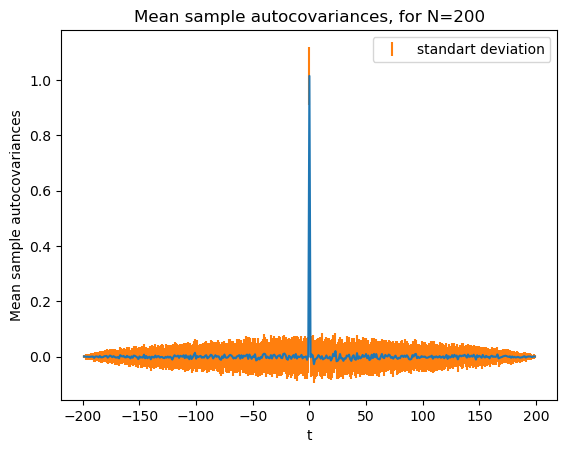

In [5]:
time, mean, std = autocovariance_mean_std(200, 100)


plt.plot(time, mean)
plt.errorbar(time, mean, std, linestyle='None', zorder=-3, label='standart deviation')
plt.xlabel('t'); plt.ylabel('Mean sample autocovariances')
plt.title('Mean sample autocovariances, for N=200')
plt.legend()
plt.show()

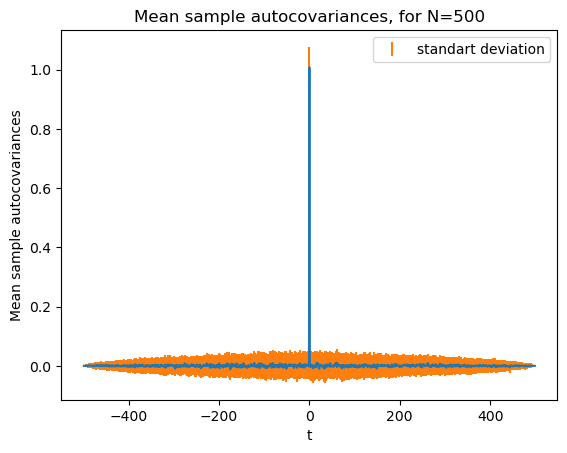

In [6]:
time, mean, std = autocovariance_mean_std(500, 100)


plt.plot(time, mean)
plt.errorbar(time, mean, std, linestyle='None', zorder=-3, label='standart deviation')
plt.xlabel('t'); plt.ylabel('Mean sample autocovariances')
plt.title('Mean sample autocovariances, for N=500')
plt.legend()
plt.show()

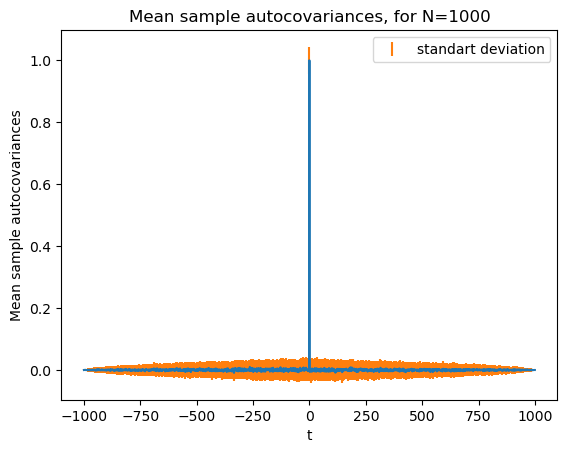

In [7]:
time, mean, std = autocovariance_mean_std(1000, 100)


plt.plot(time, mean)
plt.errorbar(time, mean, std, linestyle='None', zorder=-3, label='standart deviation')
plt.xlabel('t'); plt.ylabel('Mean sample autocovariances')
plt.title('Mean sample autocovariances, for N=1000')
plt.legend()
plt.show()

In [8]:
def periodogram(N, sim):
    k_values = np.arange(math.floor(N / 2) + 1)
    periodograms = np.zeros((len(k_values), sim))
    autocovariances = np.zeros((N, sim))
    
    cosine_terms = np.cos(2 * np.pi * k_values[:, None] * np.arange(N) / N)
    cosine_terms[:, 1:] *= 2

    for ind in range(sim):
        X = np.random.randn(N)
        autocovariances[:, ind] = [autocovariance(X, N, lag) for lag in range(N)]
        
        periodograms[:, ind] = np.dot(cosine_terms, autocovariances[:, ind])

    mean_periodogram = periodograms.mean(axis=1)
    std_periodogram = periodograms.std(axis=1)

    return k_values, mean_periodogram, std_periodogram


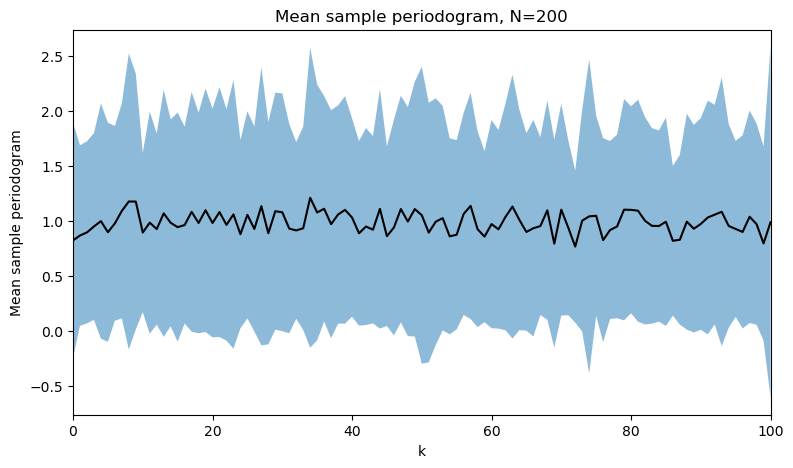

In [9]:
time, mean, std = periodogram(200, 100)


fig, ax = fig_ax(figsize=(9, 5))

ax.plot(time, mean, 'k-')
ax.fill_between(time, mean-std, mean+std, alpha=0.5)
ax.set_title("Mean sample periodogram, N=200")
ax.set_xlabel("k")
ax.set_ylabel("Mean sample periodogram")
plt.show()

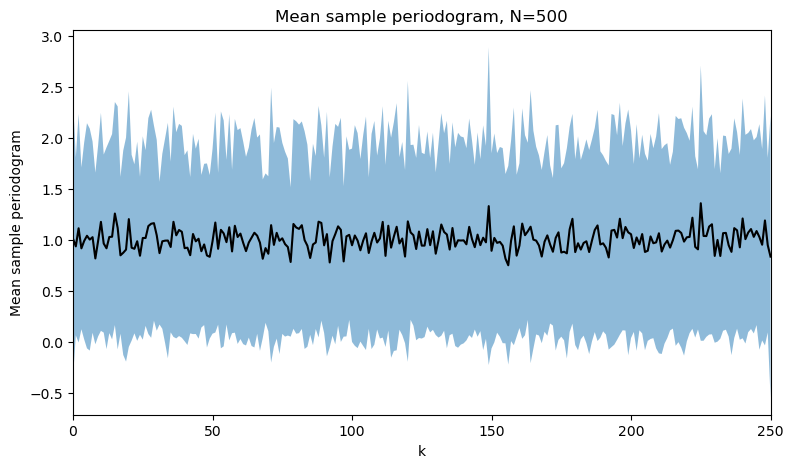

In [10]:
time, mean, std = periodogram(500, 100)


fig, ax = fig_ax(figsize=(9, 5))

ax.plot(time, mean, 'k-')
ax.fill_between(time, mean-std, mean+std, alpha=0.5)
ax.set_title("Mean sample periodogram, N=500")
ax.set_xlabel("k")
ax.set_ylabel("Mean sample periodogram")
plt.show()

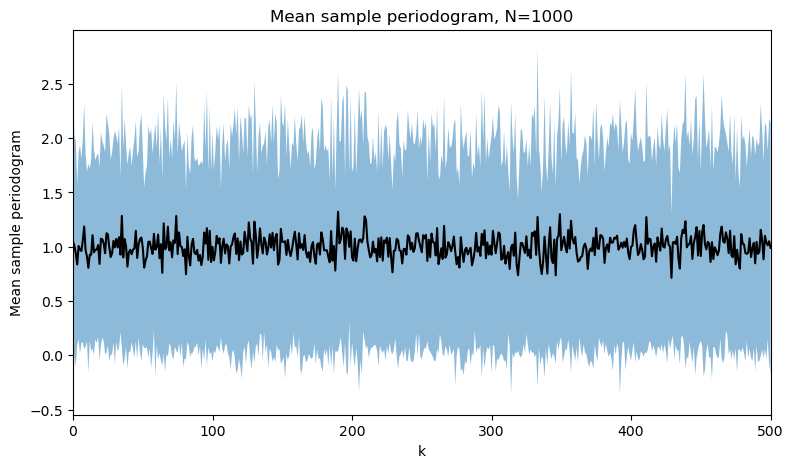

In [11]:
time, mean, std = periodogram(1000, 100)


fig, ax = fig_ax(figsize=(9, 5))

ax.plot(time, mean, 'k-')
ax.fill_between(time, mean-std, mean+std, alpha=0.5)
ax.set_title("Mean sample periodogram, N=1000")
ax.set_xlabel("k")
ax.set_ylabel("Mean sample periodogram")
plt.show()

## Question 9

In [12]:
def avg_periodograms(N, K, n_sim):
    n_k = N // K 
    k_values = np.arange(math.floor(n_k / 2) + 1)
    periodograms = np.zeros((len(k_values), n_sim, K))
    autocovariances = np.zeros((n_k, n_sim, K))
    
    cosine_terms = np.cos(2 * np.pi * k_values[:, None] * np.arange(n_k) / n_k)
    cosine_terms[:, 1:] *= 2

    for sim_idx in range(n_sim):
        signal = np.random.randn(N)
        segments = np.array_split(signal, K)

        for segment_idx in range(K):
            autocovariances[:, sim_idx, segment_idx] = [ autocovariance(segments[segment_idx], n_k, lag) for lag in range(n_k)]
            periodograms[:, sim_idx, segment_idx] = np.dot(cosine_terms, autocovariances[:, sim_idx, segment_idx])

    mean_periodogram = periodograms.mean(axis=(1, 2))
    std_periodogram = periodograms.mean(axis=2).std(axis=1)

    return k_values, mean_periodogram, std_periodogram


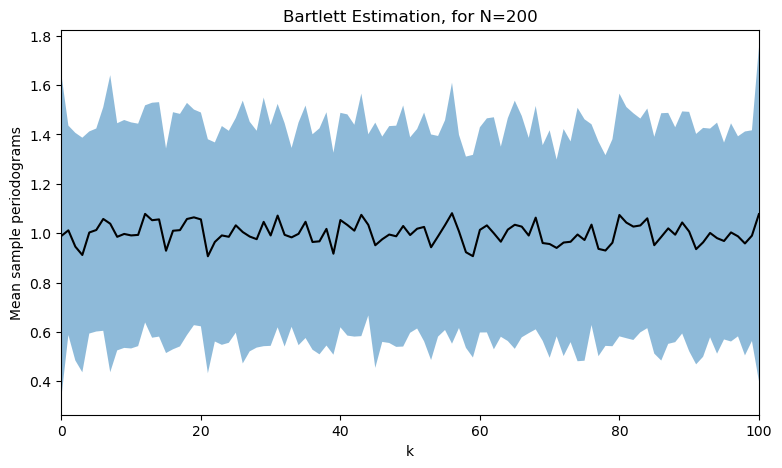

In [13]:
K, n_sim = 5, 100
N = 200*K 
k_values, mean_sample_periodograms, std_sample_periodograms = avg_periodograms(N, K, n_sim)

fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'),
plt.ylabel('Mean sample periodograms')
plt.title('Bartlett Estimation, for N=200')
plt.show()

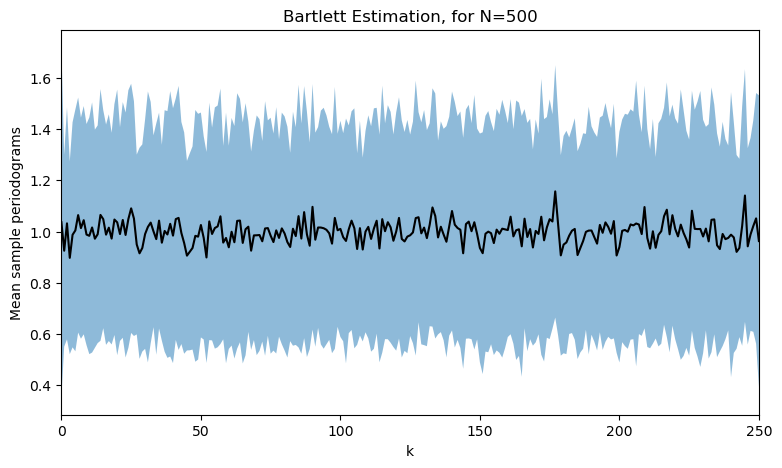

In [14]:
K, n_sim = 5, 100
N = 500*K 
k_values, mean_sample_periodograms, std_sample_periodograms = avg_periodograms(N, K, n_sim)

fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'),
plt.ylabel('Mean sample periodograms')
plt.title('Bartlett Estimation, for N=500')
plt.show()

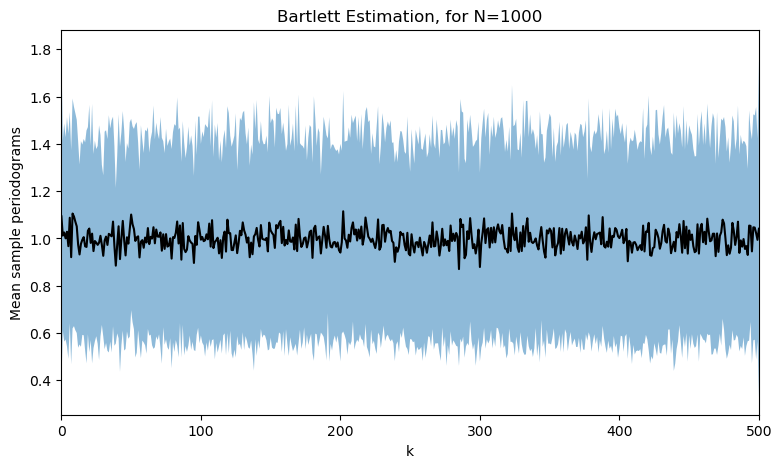

In [15]:
K, n_sim = 5, 100
N = 1000*K 
k_values, mean_sample_periodograms, std_sample_periodograms = avg_periodograms(N, K, n_sim)

fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'),
plt.ylabel('Mean sample periodograms')
plt.title('Bartlett Estimation, for N=1000')
plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [16]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10

In [17]:
!pip install dtw-python

In [18]:
import random
from dtw import dtw
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [19]:
def make_same_length(X_train, X_test):
  '''
    Returns lists of same length with  filled to complete the list if needed.
  '''
  # Compute length max of the signals
  len_max = max(max(map(len, X_train)), max(map(len, X_test)))

  min_X = min(min(map(min, X_train)), min(map(min, X_test)))
  new_X_train = []
  new_X_test = []

  # Iteravte over signals
  for i in range(len(X_train)):
    x = X_train[i] # current signal
    new_x = list(x[:len_max]) + [- 2 * abs(min_X)]*(len_max - len(x)) # adjust length by filling with -2 * abs(min_X)
    new_X_train.append(new_x) # update current signal

  for i in range(len(X_test)):
    x = X_test[i] # current signal
    new_x = list(x[:len_max]) + [- 2 * abs(min_X)]*(len_max - len(x)) # adjust length by filling with -2 * abs(min_X)
    new_X_test.append(new_x) # update current signal

  return new_X_train, new_X_test, len_max, min_X

# Function which compute DTW from 2 signals
def custom_DTW(x, y):
  '''
    Compute DTW between x and y and returns the distance.
  '''
  return dtw(x, y, keep_internals=True).distance

In [20]:
# Shuffle train set before training
zipped_data = list(zip(X_train, y_train))
random.shuffle(zipped_data)
X_train, y_train = zip(*zipped_data)

# Get lists with updated length
X_train, X_test, len_max, min_X = make_same_length(X_train, X_test)

In [21]:
# Model and gridsearch
f1_scorer = make_scorer(f1_score, pos_label=1)
model = KNeighborsClassifier(metric=custom_DTW)
nb_neighbours = np.arange(3, 6)
parameters = {'n_neighbors': list(nb_neighbours)}
clf = GridSearchCV(model, parameters, cv=5, verbose=3, scoring=f1_scorer)

clf.fit(X_train, y_train) # train

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.750 total time=   6.7s
[CV 2/5] END .....................n_neighbors=3;, score=0.867 total time=   6.8s
[CV 3/5] END .....................n_neighbors=3;, score=0.839 total time=   6.8s
[CV 4/5] END .....................n_neighbors=3;, score=0.914 total time=   6.5s
[CV 5/5] END .....................n_neighbors=3;, score=0.909 total time=   6.5s
[CV 1/5] END .....................n_neighbors=4;, score=0.800 total time=   6.6s
[CV 2/5] END .....................n_neighbors=4;, score=0.828 total time=   6.6s
[CV 3/5] END .....................n_neighbors=4;, score=0.839 total time=   6.6s
[CV 4/5] END .....................n_neighbors=4;, score=0.914 total time=   6.5s
[CV 5/5] END .....................n_neighbors=4;, score=0.867 total time=   6.8s
[CV 1/5] END .....................n_neighbors=5;, score=0.800 total time=   7.3s
[CV 2/5] END .....................n_neighbors=5;,

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric=<function custom_DTW at 0x124962550>),
             param_grid={'n_neighbors': [3, 4, 5]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=3)

In [22]:
print(f'Best number of neighbors : {clf.best_params_["n_neighbors"]}')

Best number of neighbors : 5


In [23]:
model = clf.best_estimator_
test_predictions = model.predict(X_test)
test_f1_0 = f1_score(y_test, test_predictions, pos_label=0)
test_f1_1 = f1_score(y_test, test_predictions, pos_label=1)

pred_train = model.predict(X_train)
train_f1_0 = f1_score(y_train, pred_train, pos_label=0)
train_f1_1 = f1_score(y_train, pred_train, pos_label=1)

print(f'F1 score label 0 : train set :{train_f1_0:.2f} -  test set :{test_f1_0:.2f}')
print(f'F1 score label 1 : train set :{train_f1_1:.2f} -  test set :{test_f1_1:.2f}')

F1 score label 0 : train set :0.88 -  test set :0.09
F1 score label 1 : train set :0.87 -  test set :0.45


## Question 11

Text(0.5, 1.0, 'Healthy step badly predicted')

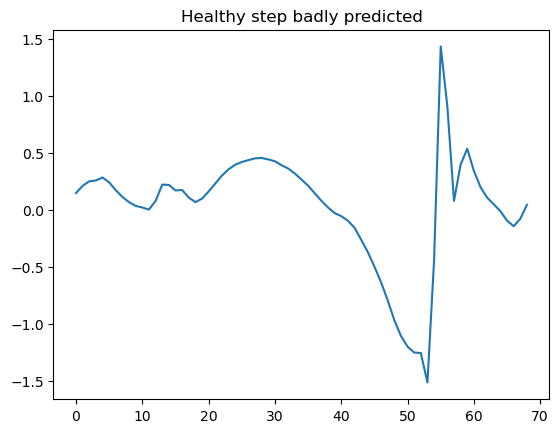

In [24]:
# Iterate over label
for i in range(len(y_test)):
  
  # If its a class healthy badly predicted
  if(y_test[i]==0 and test_predictions[i]==1):
    # Extract the signal to display
    signal_to_display = X_test[i]
    signal_to_display = [x for x in signal_to_display if x!=- 2 * abs(min_X)]
    break

plt.plot(signal_to_display)
plt.title('Healthy step badly predicted')

Text(0.5, 1.0, 'Non-Healthy step badly predicted')

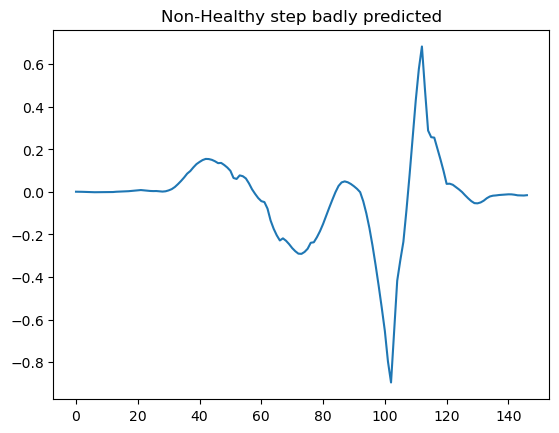

In [25]:
# Iterate over label
for i in range(len(y_test)):
  
  # If its a class non-healthy badly predicted
  if(y_test[i]==1 and test_predictions[i]==0):
    # Extract the signal to display
    signal_to_display = X_test[i]
    signal_to_display = [x for x in signal_to_display if x!=- 2 * abs(min_X)]
    break

plt.plot(signal_to_display)
plt.title('Non-Healthy step badly predicted')